In [17]:
import glob
from PIL import Image
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras 
import tensorflow as tf
import read_data
from keras.models import load_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# load model and visualize result

In [6]:
dr = read_data.DataReader()
dr.f_data_reader(200)

len files :  1443
num class :  6


Data Read Done!
Training X Size : (1154, 200, 200, 3)
Training Y Size : (1154,)
Test X Size : (289, 200, 200, 3)
Test Y Size : (289,)




In [ ]:
dr.x_test, dr.y_test

In [7]:
model = load_model('./trained_models/model1_20_epochs.h5')
predictions = model.predict(dr.x_test)

10/10 [==============================] - 2s 155ms/step


In [12]:
y_pred = np.argmax(predictions, axis=1)
# Compute the accuracy score
acc = accuracy_score(dr.y_test, y_pred)
acc

0.916955017301038

In [16]:
# Assuming that `predictions` and `y_test` are numpy arrays with shape (num_samples, num_classes)
# Convert the predictions from one-hot encoding to class labels (if necessary)
y_pred = np.argmax(predictions, axis=1)

# Find the indices of misclassified samples
misclassified_indices = np.where(y_pred != dr.y_test)#[0]??
print(misclassified_indices)
# Print out the misclassified samples
for i in misclassified_indices:
    print('True label:', dr.y_test[i])
    print('Predicted label:', y_pred[i])
    print('Sample:', x_test[i])


(array([  1,   4,   8,  10,  26,  53,  83,  95, 128, 155, 159, 167, 193,
       202, 208, 209, 224, 227, 232, 248, 256, 270, 271, 281], dtype=int64),)


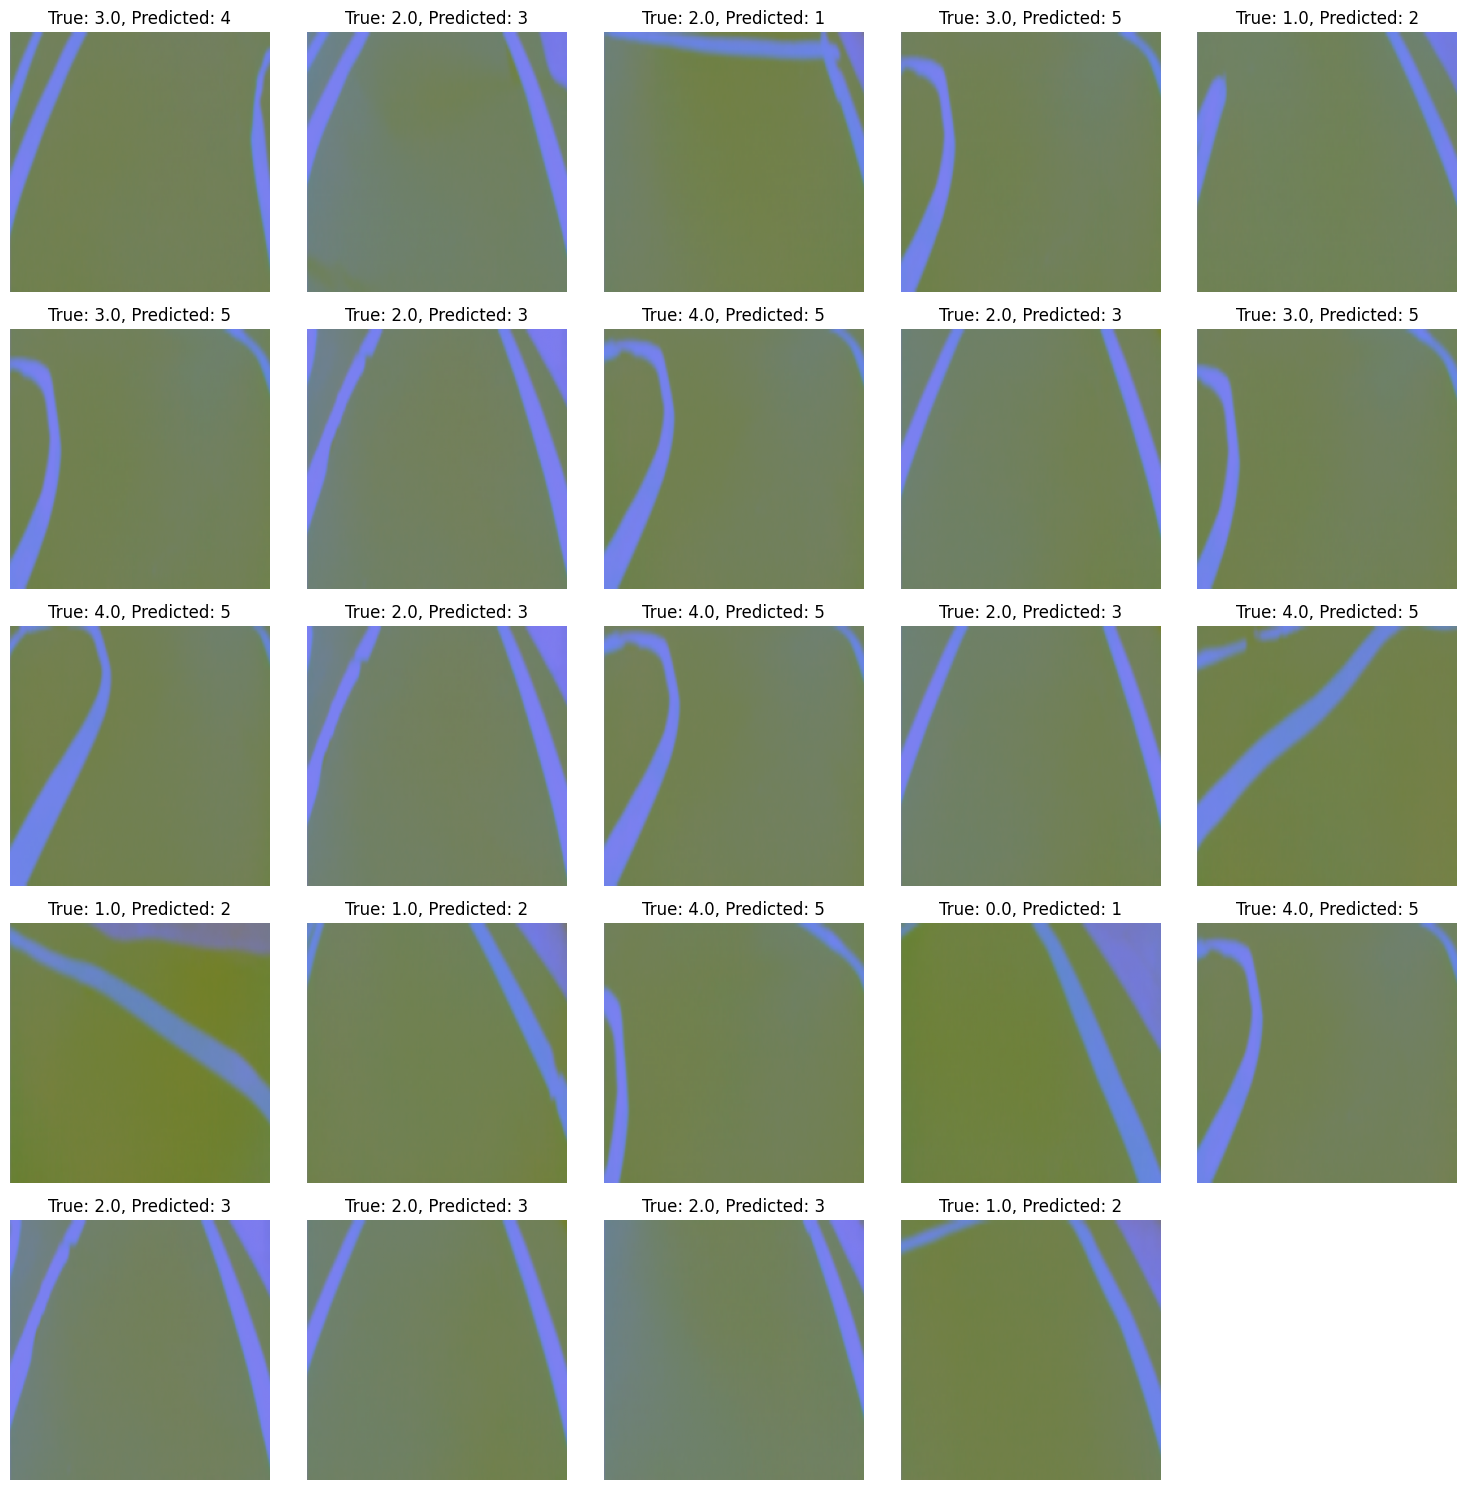

In [18]:

# Assuming that `x_test` contains images and has shape (num_samples, width, height, num_channels)
# and that `predictions` and `y_test` are numpy arrays with shape (num_samples, num_classes)
# Convert the predictions from one-hot encoding to class labels (if necessary)
y_pred = np.argmax(predictions, axis=1)

# Find the indices of misclassified samples
misclassified_indices = np.where(y_pred != dr.y_test)[0]

# Plot the misclassified samples
num_misclassified = len(misclassified_indices)
num_rows = num_misclassified // 5 + 1
fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))
for i, ax in enumerate(axes.flatten()):
    if i < num_misclassified:
        sample_index = misclassified_indices[i]
        true_label = dr.y_test[sample_index]
        predicted_label = y_pred[sample_index]
        sample_image = dr.x_test[sample_index]
        ax.imshow(sample_image)
        ax.set_title(f'True: {true_label}, Predicted: {predicted_label}')
    ax.axis('off')
plt.tight_layout()
plt.show()
